Imports

In [24]:
# Prerequisites - Install packages
# !pip install pandas matplotlib seaborn scikit-learn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

# Set up matplotlib style similar to ggplot2
plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

Create Dataset

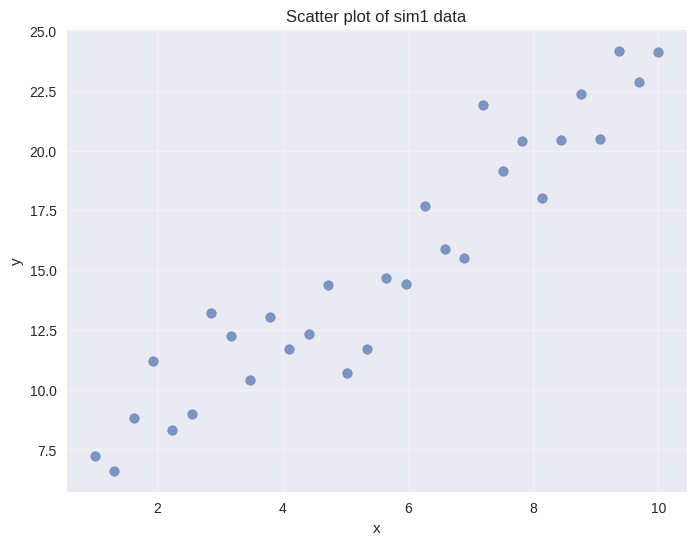

In [25]:
np.random.seed(42)  # for reproducibility
n = 30
x = np.linspace(1, 10, n)
y = 4.2 + 2.05 * x + np.random.normal(0, 2, n)
sim1 = pd.DataFrame({'x': x, 'y': y})

# Plot the data (equivalent to sim1 %>% ggplot(aes(x, y)) + geom_point())
plt.figure(figsize=(8, 6))
plt.scatter(sim1['x'], sim1['y'], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of sim1 data')
plt.grid(True, alpha=0.3)
plt.show()

Linear Regression

In [26]:
# Fit linear model
X = sim1[['x']]  # sklearn expects 2D array for features
y_target = sim1['y']

sim1_model = LinearRegression()
sim1_model.fit(X, y_target)

# Get coefficients
intercept = sim1_model.intercept_  # Where it intercepts the Y axis
slope = sim1_model.coef_[0]        # Slope steepness (1 across = Coef up)

print(f"\nModel Coefficients:")
print(f"(Intercept): {intercept:.6f}")
print(f"x:           {slope:.6f}")


Model Coefficients:
(Intercept): 5.069212
x:           1.823544


Plotting

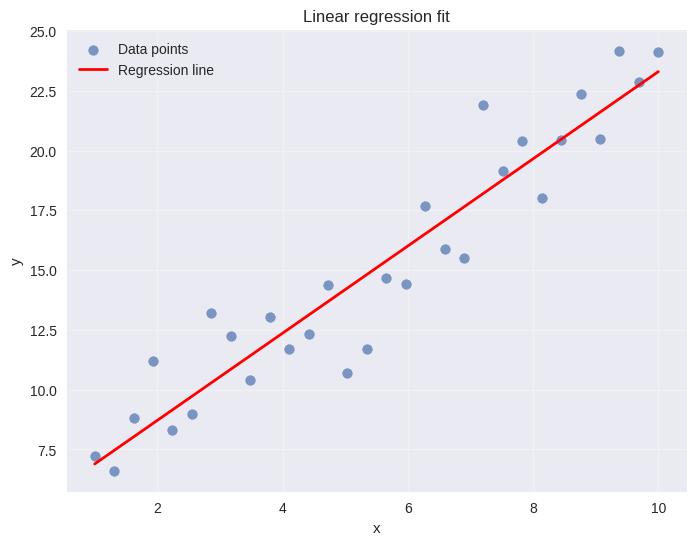

In [27]:
# Plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(sim1['x'], sim1['y'], alpha=0.7, label='Data points')
plt.plot(sim1['x'], intercept + slope * sim1['x'], 'red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Add Predicted Values and Residuals to table

In [28]:
# going to add straight to the original data set for ease.
sim1['prediction'] = sim1_model.predict(sim1[['x']])  # predict from the x value
sim1['residual'] = sim1['y'] - sim1['prediction']
print(sim1.head())

          x          y  prediction  residual
0  1.000000   7.243428    6.892757  0.350672
1  1.310345   6.609678    7.458684 -0.849006
2  1.620690   8.817791    8.024612  0.793179
3  1.931034  11.204680    8.590539  2.614141
4  2.241379   8.326521    9.156467 -0.829946


Plot with residuals.

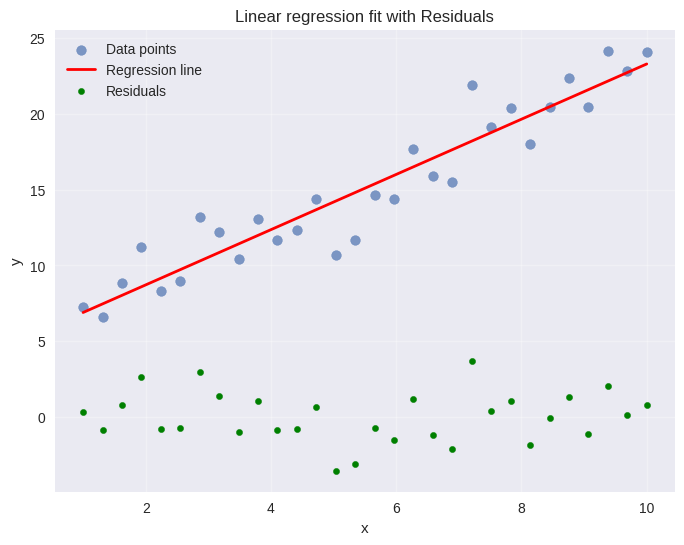

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(sim1['x'], sim1['y'], alpha=0.7, label='Data points')
plt.plot(sim1['x'], intercept + slope * sim1['x'], 'red', linewidth=2, label='Regression line')
plt.scatter(sim1['x'], sim1['residual'], color='green', s=20, label='Residuals')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression fit with Residuals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Trend the residuals!

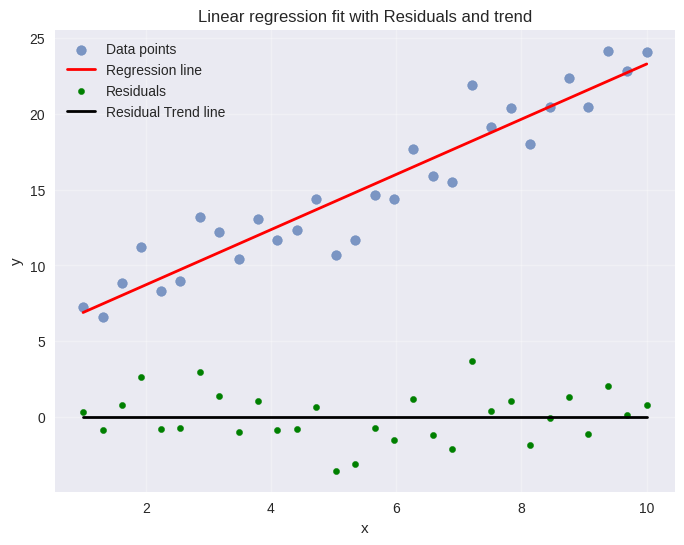

In [30]:
residual_X = sim1[['x']]
residual_y_target = sim1['residual']
residual_model = LinearRegression()
residual_model.fit(residual_X, residual_y_target)
residual_intercept = residual_model.intercept_
residual_slope = residual_model.coef_[0]

# and plot again
plt.figure(figsize=(8, 6))
plt.scatter(sim1['x'], sim1['y'], alpha=0.7, label='Data points')
plt.plot(sim1['x'], intercept + slope * sim1['x'], 'red', linewidth=2, label='Regression line')
plt.scatter(sim1['x'], sim1['residual'], color='green', s=20, label='Residuals')
plt.plot(sim1['x'], residual_intercept + residual_slope * sim1['x'], 'black', linewidth=2, label='Residual Trend line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression fit with Residuals and trend')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Additional Metrics

In [31]:
# Additional analysis - model performance metrics
r2_score = sim1_model.score(X, y_target)
mse = mean_squared_error(y_target, sim1['prediction'])
rmse = np.sqrt(mse)

print(f"\nModel Performance:")
print(f"R-squared: {r2_score:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Model Performance:
R-squared: 0.8968
MSE: 2.7620
RMSE: 1.6619
